### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot
from tabulate import tabulate


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [12]:
def Faturamento (loja):
  faturamento = int(loja["Preço"].sum())
  return faturamento

1464025

Text(0, 0.5, 'Faturamentos em R$')

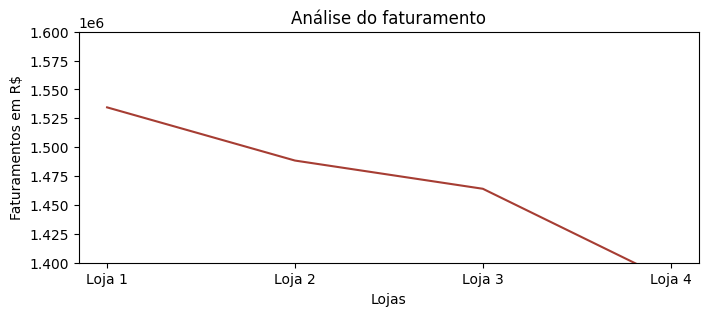

In [4]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = []
faturamentos.append(Faturamento(loja))
faturamentos.append(Faturamento(loja2))
faturamentos.append(Faturamento(loja3))
faturamentos.append(Faturamento(loja4))
fig = matplotlib.pyplot.figure()
fig.set_size_inches(8, 3)

matplotlib.pyplot.title('Análise do faturamento')
matplotlib.pyplot.plot(lojas, faturamentos, color = '#A63D33')
matplotlib.pyplot.ylim(1400000, 1600000)
matplotlib.pyplot.xlabel('Lojas')
matplotlib.pyplot.ylabel('Faturamentos em R$')


# 2. Vendas por Categoria


In [5]:
def Vendas (loja):
  vendas_por_categoria = loja['Categoria do Produto'].value_counts()
  print(vendas_por_categoria)

In [6]:
Vendas(loja)
Vendas(loja2)
Vendas(loja3)
Vendas(loja4)

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         2

# 3. Média de Avaliação das Lojas

In [100]:
def Media_Avaliacao(loja):
  soma_avaliacao = loja['Avaliação da compra'].sum()
  media_avaliacao = float(soma_avaliacao/len(loja['Avaliação da compra']))
  return media_avaliacao


Text(0, 0.5, 'Médias')

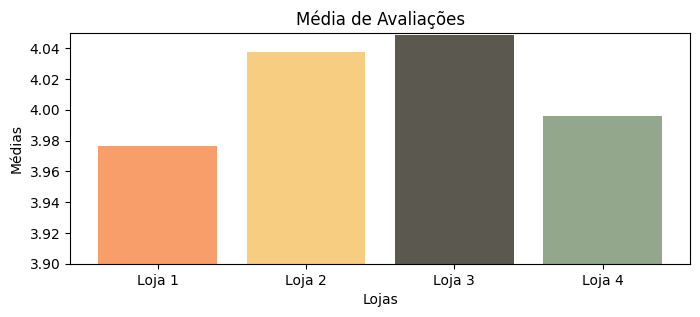

In [107]:
media = []
media.append(Media_Avaliacao(loja))
media.append(Media_Avaliacao(loja2))
media.append(Media_Avaliacao(loja3))
media.append(Media_Avaliacao(loja4))
cores = ['#F79E6B', '#F7CD82', '#5B584F', '#92A78C']
fig = matplotlib.pyplot.figure()
fig.set_size_inches(8, 3)

matplotlib.pyplot.title('Média de Avaliações')
matplotlib.pyplot.ylim(3.9, 4.05)
matplotlib.pyplot.bar(lojas, media, color=cores)
matplotlib.pyplot.xlabel('Lojas')
matplotlib.pyplot.ylabel('Médias')

# 4. Produtos Mais e Menos Vendidos

In [213]:
def Produtos(loja):
  produto= list(zip(loja['Produto'], loja['Produto'].value_counts()))
  return produto[0], produto[len(produto) - 1]

Produtos(loja)
Produtos(loja2)
Produtos(loja3)
Produtos(loja4)

(('Lava louças', 62), ('Panela de pressão', 33))

In [219]:
produtos_lojas = []
produtos_lojas.append(Produtos(loja))
produtos_lojas.append(Produtos(loja2))
produtos_lojas.append(Produtos(loja3))
produtos_lojas.append(Produtos(loja4))

tabela= list(zip(lojas, produtos_lojas))
print(tabulate(tabela))




------  ----------------------------------------------------
Loja 1  (('Assistente virtual', 60), ('Tablet ABXY', 33))
Loja 2  (('Cadeira de escritório', 65), ('Pandeiro', 32))
Loja 3  (('Secadora de roupas', 57), ('Mesa de jantar', 35))
Loja 4  (('Lava louças', 62), ('Panela de pressão', 33))
------  ----------------------------------------------------


# 5. Frete Médio por Loja


In [210]:
def Frete_Medio(loja):
  soma_frete = loja['Frete'].sum()
  frete_medio = float(soma_frete/len(loja['Frete']))
  return frete_medio

Text(0, 0.5, 'Médias dos fretes')

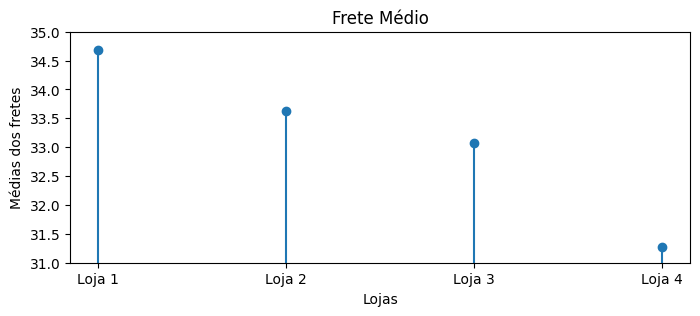

In [206]:
frete_media = []
frete_media.append(Frete_Medio(loja))
frete_media.append(Frete_Medio(loja2))
frete_media.append(Frete_Medio(loja3))
frete_media.append(Frete_Medio(loja4))


cores = ['#F79E6B', '#F7CD82', '#5B584F', '#92A78C']
fig = matplotlib.pyplot.figure()
fig.set_size_inches(8, 3)

matplotlib.pyplot.title('Frete Médio')
matplotlib.pyplot.ylim(31, 35)
matplotlib.pyplot.stem(lojas, frete_media)
matplotlib.pyplot.xlabel('Lojas')
matplotlib.pyplot.ylabel('Médias dos fretes')

Resultado:

Com base na análise dos dados, a unidade com maior indicação para desinvestimento é a Loja 4. Embora essa loja apresente o menor custo médio de frete em comparação com as demais, seu desempenho em outros indicadores é inferior. Especificamente, a Loja 4 ocupa a penúltima posição no ranking de avaliação média dos clientes (nota média em ordem crescente) e possui um perfil de vendas por categoria semelhante ao das demais unidades, o que não representa um diferencial competitivo. Além disso, seu faturamento é significativamente inferior, não sendo suficiente para compensar os aspectos positivos identificados.